In [13]:
import tensorflow as tf
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw
import os
import matplotlib.pyplot as plt
import random

In [15]:
dir_path = "data/Racoon Images/images/"
csv_file_path = "data/train_labels_.csv"
image_names = os.listdir(dir_path)
random_images = random.sample(image_names, 9)
bounding_box_df = pd.read_csv(csv_file_path)

(1, 8)
           filename  width  height    class  xmin  ymin  xmax  ymax
127  raccoon-15.jpg    640     360  raccoon   313    61   614   360
<class 'pandas.core.frame.DataFrame'>


313 61 640 360
(1, 8)
           filename  width  height    class  xmin  ymin  xmax  ymax
58  raccoon-131.jpg    259     194  raccoon     1     1   199   184
<class 'pandas.core.frame.DataFrame'>


1 1 259 194
(1, 8)
           filename  width  height    class  xmin  ymin  xmax  ymax
13  raccoon-111.jpg    768     960  raccoon    41     5   683   917
<class 'pandas.core.frame.DataFrame'>


41 5 768 960
(2, 8)
          filename  width  height    class  xmin  ymin  xmax  ymax
68  raccoon-12.jpg    259     194  raccoon    28    21   126   181
69  raccoon-12.jpg    259     194  raccoon    85    33   235   193
<class 'pandas.core.frame.DataFrame'>


28 21 259 194
85 33 259 194
(1, 8)
           filename  width  height    class  xmin  ymin  xmax  ymax
49  raccoon-115.jpg    426     640  raccoon    51   130   35

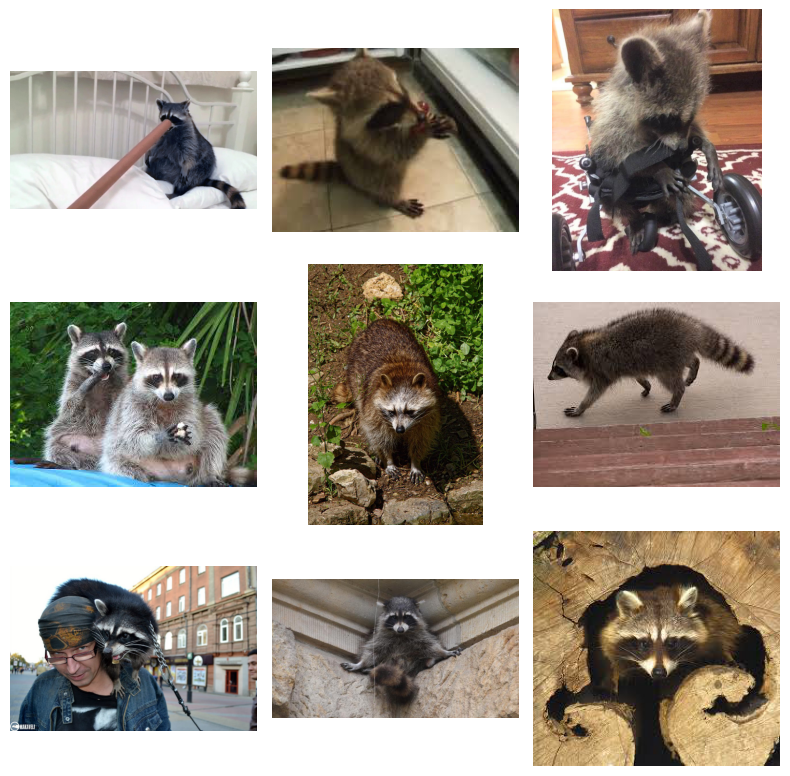

In [51]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

for i, image_file_name in enumerate(random_images):
    image_path = os.path.join(dir_path, image_file_name)
    img = Image.open(image_path)

    bbox_info = bounding_box_df[bounding_box_df['filename'] == image_file_name]
    print(bbox_info.shape)
    print(bbox_info)
    print(type(bbox_info))
    print("\n")

    axes[i // 3, i % 3].imshow(img)
    axes[i // 3, i % 3].axis("off")
    
    draw = ImageDraw.Draw(img)
    for _, row in bbox_info.iterrows():
        x0, y0, w, h = row['xmin'], row['ymin'], row['width'], row['height']
        print(x0, y0, w, h)
        draw.rectangle((x0, y0, x0 + w, y0 + h), outline="red", width=2)
     
plt.tight_layout()
plt.show()